In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

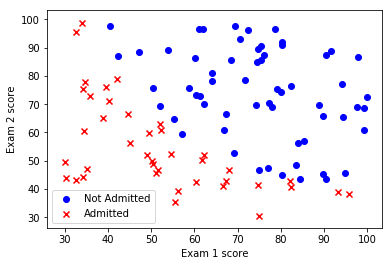

In [57]:
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

#load the dataset
data = loadtxt('ex2data1.txt', delimiter=',')

X = data[:, 0:2]
y = data[:, 2]

pos = where(y == 1)
neg = where(y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend(['Not Admitted', 'Admitted'])
show()

In [56]:
def sigmoid(z):
#SIGMOID Compute sigmoid function
#   g = SIGMOID(z) computes the sigmoid of z.
 
    return 1/(1+np.exp(-z))  


In [ ]:
def costFunction(theta, X, y):
#COSTFUNCTION Compute cost and gradient for logistic regression
#   J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
#   parameter for logistic regression and the gradient of the cost
#   w.r.t. to the parameters.

# Initialize some useful values
m = len(y); # number of training examples

# You need to return the following variables correctly 



grad = zeros(size(theta));


# ====================== YOUR CODE HERE ======================
# Instructions: Compute the cost of a particular choice of theta.
#               You should set J to the cost.
#               Compute the partial derivatives and set grad to the partial
#               derivatives of the cost w.r.t. each parameter in theta
#
# Note: grad should have the same dimensions as theta
#

h = sigmoid(np.matmul(X,theta));

J = ((-y)'*log(h)-(1-y)'*log(1-h))/m;
grad = (X'*(h - y))/m;





# =============================================================

end

In [48]:
data = pd.read_csv('ex2data1.txt', header = None)
data = np.array(data)

X = data[:, [0, 1]]; 
pos = np.where(y == 1)[0]
pos
X[pos, 0]
[m, n] = np.shape(X);
X = np.c_[np.ones(m), X ];
initial_theta = np.zeros(n + 1);
initial_theta

array([0., 0., 0.])

['Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n']


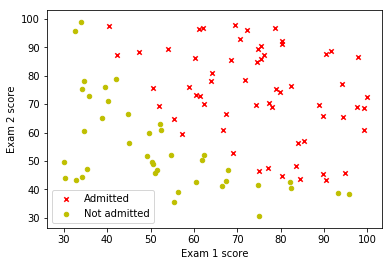

NameError: name 'costFunction' is not defined

In [58]:
## Machine Learning Online Class - Exercise 2: Logistic Regression
#
#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the logistic
#  regression exercise. You will need to complete the following functions 
#  in this exericse:
#
#     sigmoid.m
#     costFunction.m
#     predict.m
#     costFunctionReg.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#

## Initialization

## Load Data
#  The first two columns contains the exam scores and the third column
#  contains the label.

data = loadtxt('ex2data1.txt', delimiter=',')

X = data[:, 0:2]
y = data[:, 2]



## ==================== Part 1: Plotting ====================
#  We start the exercise by first plotting the data to understand the 
#  the problem we are working with.

print(['Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n']);


pos = np.where(y == 1)[0]
neg = np.where(y == 0)[0]

plt.scatter( X[pos, 0], X[pos, 1], s=20, c='r', marker='x',label='Admitted');
plt.scatter( X[neg, 0], X[neg, 1], s=20, c='y', marker='o',label='Not admitted');

# Put some labels 

# Labels and Legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

## ============ Part 2: Compute Cost and Gradient ============
#  In this part of the exercise, you will implement the cost and gradient
#  for logistic regression. You neeed to complete the code in 
#  costFunction.m

#  Setup the data matrix appropriately, and add ones for the intercept term
[m, n] = np.shape(X);

# Add intercept term to x and X_test
X = np.c_[ np.ones(m), X ];


# Initialize fitting parameters
initial_theta = np.zeros(n + 1);


# Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, X, y);

print('Cost at initial theta (zeros): #f\n', cost);
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros): \n');
print(' #f \n', grad);
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');


In [ ]:

# Compute and display cost and gradient with non-zero theta
test_theta = [-24; 0.2; 0.2];
[cost, grad] = costFunction(test_theta, X, y);

print('\nCost at test theta: #f\n', cost);
print('Expected cost (approx): 0.218\n');
print('Gradient at test theta: \n');
print(' #f \n', grad);
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n');

print('\nProgram paused. Press enter to continue.\n');
pause;


## ============= Part 3: Optimizing using fminunc  =============
#  In this exercise, you will use a built-in function (fminunc) to find the
#  optimal parameters theta.

#  Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

#  Run fminunc to obtain the optimal theta
#  This function will return theta and the cost 
[theta, cost] = fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);

# Print theta to screen
print('Cost at theta found by fminunc: #f\n', cost);
print('Expected cost (approx): 0.203\n');
print('theta: \n');
print(' #f \n', theta);
print('Expected theta (approx):\n');
print(' -25.161\n 0.206\n 0.201\n');

# Plot Boundary
plotDecisionBoundary(theta, X, y);

# Put some labels 
hold on;
# Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

# Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

print('\nProgram paused. Press enter to continue.\n');
pause;

## ============== Part 4: Predict and Accuracies ==============
#  After learning the parameters, you'll like to use it to predict the outcomes
#  on unseen data. In this part, you will use the logistic regression model
#  to predict the probability that a student with score 45 on exam 1 and 
#  score 85 on exam 2 will be admitted.
#
#  Furthermore, you will compute the training and test set accuracies of 
#  our model.
#
#  Your task is to complete the code in predict.m

#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 

prob = sigmoid([1 45 85] * theta);
print(['For a student with scores 45 and 85, we predict an admission ' ...
         'probability of #f\n'], prob);
print('Expected value: 0.775 +/- 0.002\n\n');

# Compute accuracy on our training set
p = predict(theta, X);

print('Train Accuracy: #f\n', mean(double(p == y)) * 100);
print('Expected accuracy (approx): 89.0\n');
print('\n');
